# IMDB Review Sentiment Analysis

IMDb is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

## Introduction

Opinion mining (sometimes known as sentiment analysis or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.
We can use classifiers on textual data to classify the text into its signified emotion. This can be used in various ways to predict the sentiments of any text automatically after it is trained in a corpus of sentences.

### Understanding the Problem

Here We have a datset which contains the reviews of audience for a particular movie. In this project we will classify the IMDB reviews for positive and negative sentiments.

The solution is divided into the following sections:

- [Data understanding and exploration](#1)
- [Data Preprocessing](#2)
- [Data Preparation](#3)
- [Model building and evaluation](#4)

<a id="1"></a>
## 1. Data Understanding and Exploration

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

Dataset is in the txt format with each line has the text and tab separated target value.
- 1-Positive review
- 0-Negative review


In [2]:
reviews = pd.read_csv('imdb_labelled.txt', sep= '\t+', names=["text", "sentiment"],engine='python')
reviews.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


.head() shows the first 5 values of the dataset

In [3]:
reviews.describe(include='all')

,text,sentiment
count,1000,1000.00000
unique,997,NaN
top,10/10,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [4]:
reviews.shape

(1000, 2)

In [5]:
reviews['sentiment'].value_counts()

1    500
0    500
Name: sentiment, dtype: int64

In [6]:
print("Total Data Points: {}".format(reviews.shape[0]))
print("Total Positive Sentiment Data Points: {}".format(reviews[reviews['sentiment']==1].shape[0]))
print("Percentage of Positive Sentiment Data Points: {:.1f} %".format(reviews[reviews['sentiment']==1].shape[0]/reviews.shape[0]*100))
print("Total Negative Sentiment Data Points: {}".format(reviews[reviews['sentiment']==0].shape[0]))
print("Percentage of Negative Sentiment Data Points: {:.1f} %".format(reviews[reviews['sentiment']==0].shape[0]/reviews.shape[0]*100))

Total Data Points: 1000
Total Positive Sentiment Data Points: 500
Percentage of Positive Sentiment Data Points: 50.0 %
Total Negative Sentiment Data Points: 500
Percentage of Negative Sentiment Data Points: 50.0 %


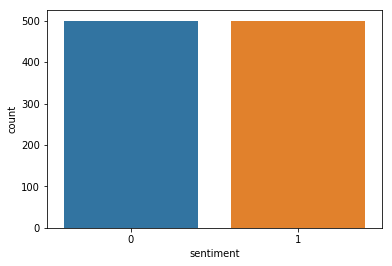

In [7]:
sns.countplot(x= reviews['sentiment'])

From the above plot one can find that that distribution of sentiments are equal in number for postive and negative sentiments.
According to our dataset,
1. Blue bar represents 0 that is the negative reviews.
2. Orange bar represents 1 that is the positive reviews.

## Word Cloud

An image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.

#### Word Cloud for negative sentiments

In [8]:
from wordcloud import WordCloud,STOPWORDS

In [9]:
df = reviews[reviews['sentiment'] == 0]
words = ' '.join(df['text'])

In [10]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words)

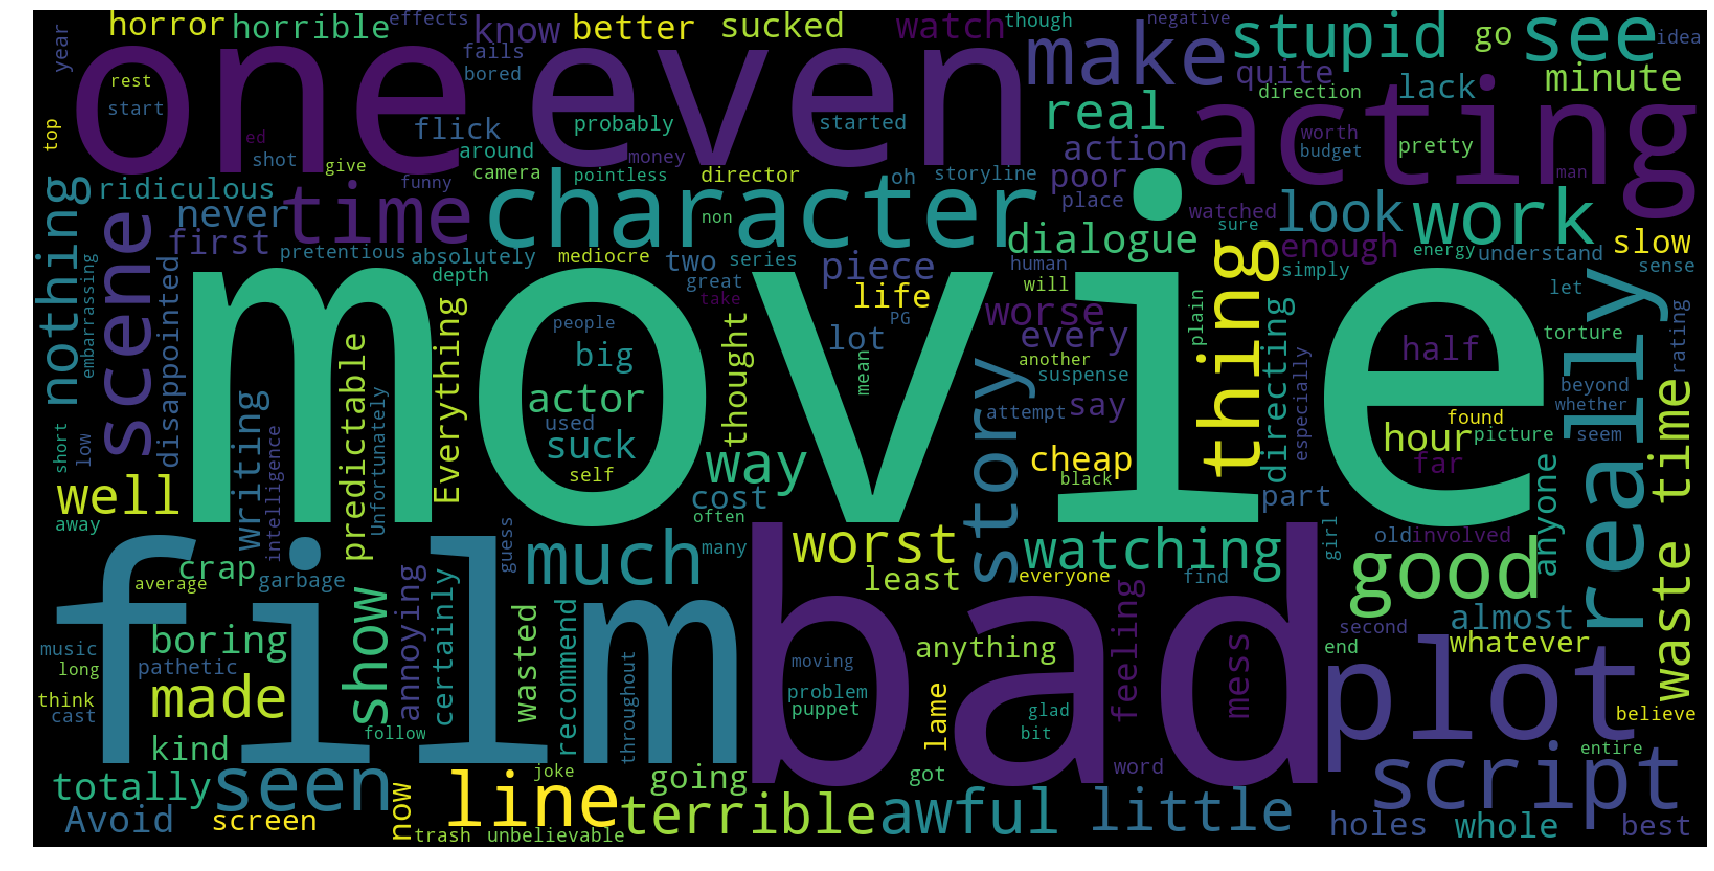

In [11]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

__We can find that reviews with negative sentiments frequently involved words like bad, acting, plot, time, script. This can mean that people don't like the plot of the movie or acting  or script.__

#### Word Cloud for postive sentiments

In [12]:
df1 = reviews[reviews['sentiment'] == 1]
words1 = ' '.join(df1['text'])

In [13]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words1)

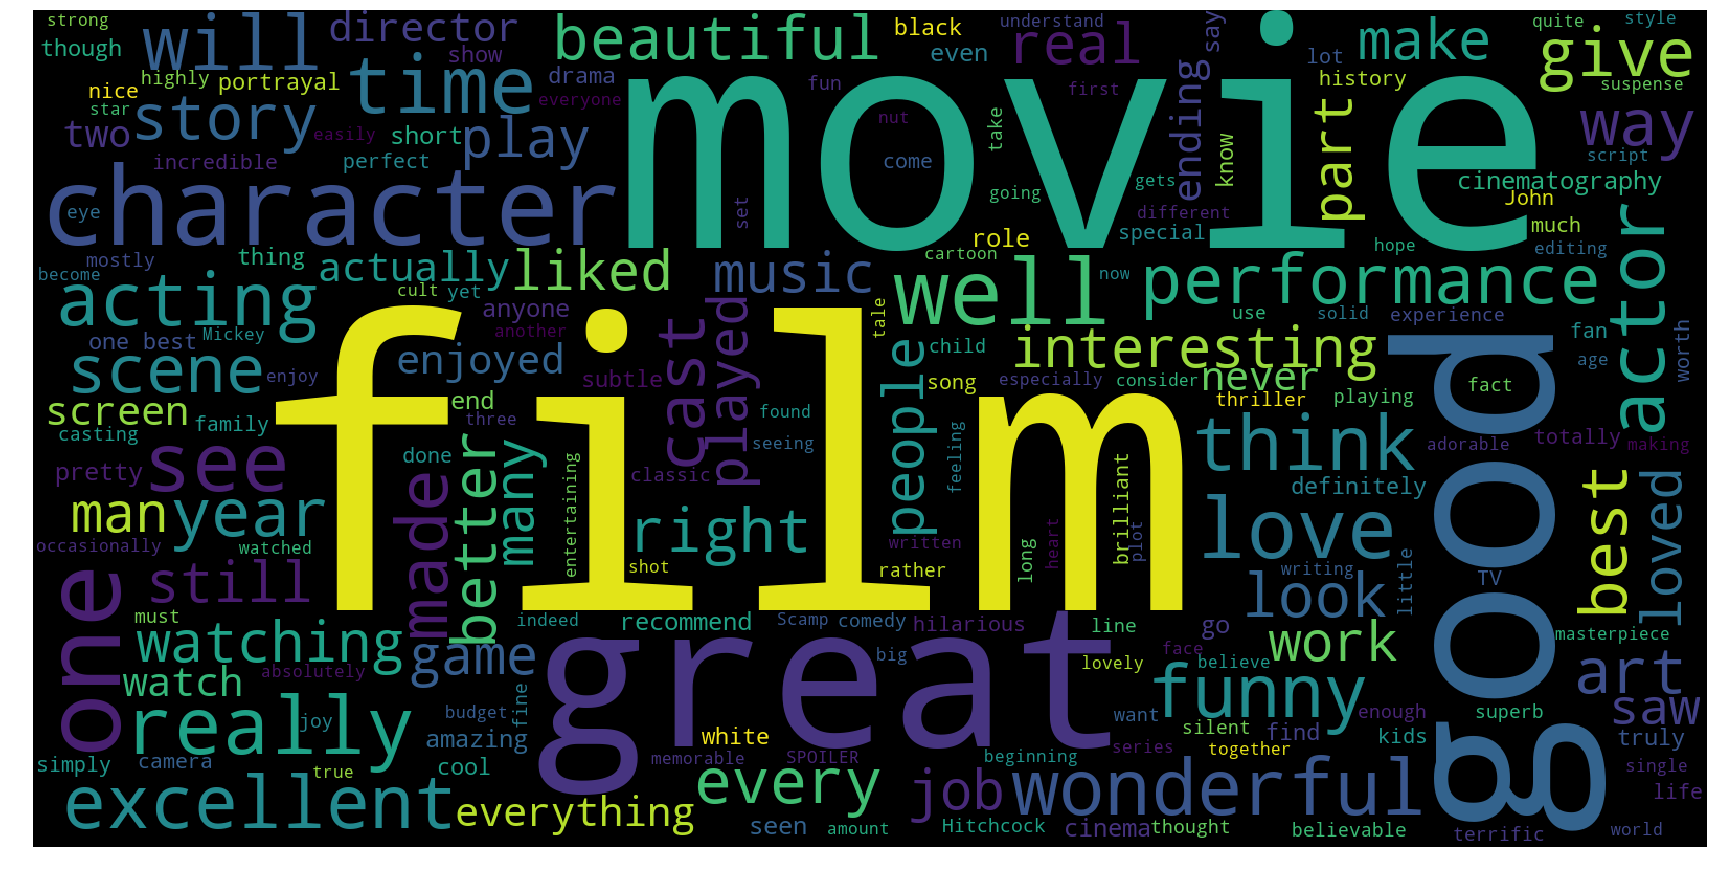

In [14]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

__We can find that reviews with positive sentiments frequently involved words like wonderful, actor, performance, great, character. This can mean that people like the characters in the movie and their performance.__

<a id="2"></a>
## 2. Data Preprocessing

#### Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.

Preprocessing steps:

- Convert sentence into lower case
- Remove Stop Words
- Stemming

__Stop Words__: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. In natural language processing, useless words (data), are referred to as stop words.

__Stemming__ is the process of producing linguistic variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [15]:
import re
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [16]:
stemmer = SnowballStemmer('english')

In [17]:
def preprocess(raw_text):
    
    letters_only = raw_text
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #lemmatizing
    words = [stemmer.stem(word) for word in words]
    
    return (" ".join(words))

In [18]:
reviews['clean_text']=reviews['text'].apply(lambda x: preprocess(x))

In [19]:
reviews.head()

,text,sentiment,clean_text
0,"A very, very, very slow-moving, aimless movie ...",0,"very, very, slow-moving, aimless movi distress..."
1,Not sure who was more lost - the flat characte...,0,"sure lost - flat charact audience, near half w..."
2,Attempting artiness with black & white and cle...,0,attempt arti black & white clever camera angle...
3,Very little music or anything to speak of.,0,littl music anyth speak of.
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...


Here, I have added a new column named clean_text which does not include stop words and have been lemmatize for better context. 

<a id="3"></a>
## 3. Data Preparation

In this project I am using a variation of word2vec i.e. GloVe(Global Vectors for Word Representation by Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014).This introduces a concept of negative sampling into the word2vec algorithm.
I have used pre-trained word vectors in the project that is open sourced in the Stanford website.
Read more about GloVe here: https://nlp.stanford.edu/projects/glove/

Download the word embedding with GloVe here: http://nlp.stanford.edu/data/glove.6B.zip
This has many text files with different dimensions of the word vectors. I have used the __glove.6B.50d.txt__. Each line has space separated word and embeddings of 50 dimension .

In [20]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [21]:
glove2word2vec(glove_input_file='glove.6B.50d.txt',word2vec_output_file="glove_vectors.txt")
model=KeyedVectors.load_word2vec_format("glove_vectors.txt")

__Using word embeddings for sentiment classification__

I have used two methods for the classification:

- Unweighted(non-normalized) sentence vectors:

_Sentence vector non-normalized(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))

- Normalized sentence vectors:

_Sentence vector normalized(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))/ (number of words)

#### Unweighted Sentence Vectors

In [22]:
dimensional_matrix=[0]*50
def sentance_vector(x,dimensional_matrix,ret_value):
    vector = dimensional_matrix
    for i in x:
        try:
            vector=np.add(vector,model[i])
        except:
            vector=np.add(vector,dimensional_matrix)
            continue
    return vector[ret_value]

In [23]:
non_normalize=reviews
for i in range(50):
    non_normalize['vector'+str(i)]= non_normalize['clean_text'].apply(sentance_vector,args=[dimensional_matrix,i])
non_normalize.head()

,text,sentiment,clean_text,vector0,vector1,vector2,vector3,vector4,vector5,vector6,...,vector40,vector41,vector42,vector43,vector44,vector45,vector46,vector47,vector48,vector49
0,"A very, very, very slow-moving, aimless movie ...",0,"very, very, slow-moving, aimless movi distress...",-3.378200,51.851210,32.548182,41.170720,13.790286,-0.116288,21.80371,...,42.458390,9.350141,-1.809916,-12.413523,-6.641224,21.953084,7.614435,-29.516036,15.811471,52.539110
1,Not sure who was more lost - the flat characte...,0,"sure lost - flat charact audience, near half w...",-5.210791,34.037420,27.762027,30.291000,17.565326,2.555078,14.52960,...,32.618143,7.114785,-12.224537,-1.557147,-2.288562,12.823339,8.242551,-13.784878,13.784870,39.812561
2,Attempting artiness with black & white and cle...,0,attempt arti black & white clever camera angle...,-8.065146,88.104631,67.552371,69.671191,38.836405,1.534273,30.22021,...,83.721405,12.047975,-21.013243,2.597455,-2.700610,32.265835,20.355458,-44.759538,38.534133,84.581211
3,Very little music or anything to speak of.,0,littl music anyth speak of.,-3.135861,18.520470,15.454389,15.119240,11.668690,-1.583044,8.60940,...,15.155298,-1.704918,-3.910360,-0.509463,-2.864295,2.964202,4.907224,-8.453298,8.184060,17.193210
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,-1.285973,35.258330,30.117404,30.019420,11.822940,0.169241,18.49053,...,35.921073,7.741354,-9.113611,-2.550403,-4.987643,17.162882,8.545186,-18.412375,12.014847,47.746061


#### Normalized Sentence Vectors

In [24]:
dimensional_matrix=[0]*50
def sentance_vector(x,dimensional_matrix,ret_value):
    vector= dimensional_matrix
    for i in x:
        try:
            vector=np.add(vector,model[i])
        except:
            vector=np.add(vector,dimensional_matrix)
            continue
    vector=np.divide(vector,len(vector))
    return vector[ret_value]

In [25]:
normalize= reviews
for i in range(50):
    normalize['vector'+str(i)]= normalize['clean_text'].apply(sentance_vector,args=[dimensional_matrix,i])

In [26]:
normalize.head()

,text,sentiment,clean_text,vector0,vector1,vector2,vector3,vector4,vector5,vector6,...,vector40,vector41,vector42,vector43,vector44,vector45,vector46,vector47,vector48,vector49
0,"A very, very, very slow-moving, aimless movie ...",0,"very, very, slow-moving, aimless movi distress...",-0.067564,1.037024,0.650964,0.823414,0.275806,-0.002326,0.436074,...,0.849168,0.187003,-0.036198,-0.248270,-0.132824,0.439062,0.152289,-0.590321,0.316229,1.050782
1,Not sure who was more lost - the flat characte...,0,"sure lost - flat charact audience, near half w...",-0.104216,0.680748,0.555241,0.605820,0.351307,0.051102,0.290592,...,0.652363,0.142296,-0.244491,-0.031143,-0.045771,0.256467,0.164851,-0.275698,0.275697,0.796251
2,Attempting artiness with black & white and cle...,0,attempt arti black & white clever camera angle...,-0.161303,1.762093,1.351047,1.393424,0.776728,0.030685,0.604404,...,1.674428,0.240960,-0.420265,0.051949,-0.054012,0.645317,0.407109,-0.895191,0.770683,1.691624
3,Very little music or anything to speak of.,0,littl music anyth speak of.,-0.062717,0.370409,0.309088,0.302385,0.233374,-0.031661,0.172188,...,0.303106,-0.034098,-0.078207,-0.010189,-0.057286,0.059284,0.098144,-0.169066,0.163681,0.343864
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,-0.025719,0.705167,0.602348,0.600388,0.236459,0.003385,0.369811,...,0.718421,0.154827,-0.182272,-0.051008,-0.099753,0.343258,0.170904,-0.368247,0.240297,0.954921


### Splitting the Dataset for training and testing

__For Unweighted Data__

In [27]:
# features and target for non normalize data
non_norm_x = non_normalize.drop(['text','sentiment','clean_text'], axis = 1)
non_norm_y = non_normalize['sentiment']

In [28]:
# splitting the non normalize data for training and testing
from sklearn.model_selection import train_test_split
x_train_non_norm, x_test_non_norm, y_train_non_norm, y_test_non_norm = train_test_split(non_norm_x,non_norm_y,test_size=0.2,random_state=0)

__For Normalize Data__

In [29]:
# features and target for normalize data
norm_x = normalize.drop(['text','sentiment','clean_text'], axis = 1)
norm_y = normalize['sentiment']

In [30]:
# splitting the normalize data for training and testing
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(norm_x,norm_y,test_size=0.2,random_state=0)

<a id="4"></a>
## 4. Model Building and Evaluation

#### Importing the Libraries

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Unweighted Dataset

__Logistic Regression__

In [32]:
# non normalized machine learning model
Lr=LogisticRegression()
Lr.fit(x_train_non_norm,y_train_non_norm)
PredictionLr = Lr.predict(x_test_non_norm)
acc_lr1= accuracy_score(PredictionLr,y_test_non_norm)*100
f_lr1 = f1_score(PredictionLr,y_test_non_norm)
print("Accuracy : {:.1f} %".format(acc_lr1))
print("F1-Score : {:.1f} ".format(f_lr1))

Accuracy : 51.5 %
F1-Score : 0.5 


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__Naive Bayes__

In [33]:
NB = GaussianNB()
NB.fit(x_train_non_norm,y_train_non_norm)
PredictionNB = NB.predict(x_test_non_norm)
acc_nb1 = accuracy_score(PredictionNB,y_test_non_norm)*100
f_nb1 = f1_score(PredictionNB,y_test_non_norm)
print("Accuracy : {:.1f} %".format(acc_nb1))
print("F1-Score : {:.1f} ".format(f_nb1))

Accuracy : 51.0 %
F1-Score : 0.4 


__SVM__

In [34]:
svm=SVC(kernel='linear')
svm.fit(x_train_non_norm,y_train_non_norm)
PredictionSVC=svm.predict(x_test_non_norm)
acc_svm1 = accuracy_score(PredictionSVC,y_test_non_norm)*100
f_svm1 = f1_score(PredictionSVC,y_test_non_norm)
print("Accuracy : {:.2f} %".format(acc_svm1))
print("F1-Score : {:.2f} ".format(f_svm1))

Accuracy : 51.00 %
F1-Score : 0.36 


__Random Forest Classifier__

In [35]:
Rfc=RandomForestClassifier(n_estimators=10,criterion='gini')
Rfc.fit(x_train_non_norm,y_train_non_norm)
PredictionRfc=Rfc.predict(x_test_non_norm)
acc_rf1 = accuracy_score(PredictionRfc,y_test_non_norm)*100
f_rf1 = f1_score(PredictionRfc,y_test_non_norm)
print("Accuracy : {:.2f} %".format(acc_rf1))
print("F1-Score : {:.2f} ".format(f_rf1))

Accuracy : 55.00 %
F1-Score : 0.52 


__Decision Tree Classifier__

In [36]:
Dt = DecisionTreeClassifier(criterion='entropy')
Dt.fit(x_train_non_norm,y_train_non_norm)
PredictionDt = Dt.predict(x_test_non_norm)
acc_dt1 = accuracy_score(PredictionDt,y_test_non_norm)*100
f_dt1 = f1_score(PredictionDt,y_test_non_norm)
print("Accuracy : {:.2f} %".format(acc_dt1))
print("F1-Score : {:.2f} ".format(f_dt1))

Accuracy : 53.00 %
F1-Score : 0.55 


### Normalize Dataset

__Logistic Regression__

In [37]:
Lr1=LogisticRegression()
Lr1.fit(x_train_norm,y_train_norm)
PredLr1=Lr1.predict(x_test_norm)
acc_lr2 = accuracy_score(PredLr1,y_test_norm)*100
f_lr2 = f1_score(PredLr1,y_test_norm)
print("Accuracy : {:.2f} %".format(acc_lr2))
print("F1-Score : {:.2f} ".format(f_lr2))

Accuracy : 51.50 %
F1-Score : 0.46 


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__Naive Bayes__

In [38]:
# machine learning algorithms on normalized data
Nb1=GaussianNB()
Nb1.fit(x_train_norm,y_train_norm)
PredNb1=Nb1.predict(x_test_norm)
acc_nb2 = accuracy_score(PredNb1,y_test_norm)*100
f_nb2 = f1_score(PredNb1,y_test_norm)
print("Accuracy : {:.2f} %".format(acc_nb2))
print("F1-Score : {:.2f} ".format(f_nb2))

Accuracy : 51.00 %
F1-Score : 0.37 


__SVM__

In [39]:
svm=SVC(kernel='linear')
svm.fit(x_train_norm,y_train_norm)
PredSVM=svm.predict(x_test_norm)
acc_svm2 = accuracy_score(PredSVM,y_test_norm)*100
f_svm2 = f1_score(PredSVM,y_test_norm)
print("Accuracy : {:.2f} %".format(acc_svm2))
print("F1-Score : {:.2f} ".format(f_svm2))

Accuracy : 51.00 %
F1-Score : 0.36 


__Random Forest Classifier__

In [40]:
Rfc=RandomForestClassifier(n_estimators=10,criterion='gini')
Rfc.fit(x_train_norm,y_train_norm)
PredRfc=Rfc.predict(x_test_norm)
acc_rf2 = accuracy_score(PredRfc,y_test_norm)*100
f_rf2 = f1_score(PredRfc,y_test_norm)
print("Accuracy : {:.2f} %".format(acc_rf2))
print("F1-Score : {:.2f} ".format(f_rf2))

Accuracy : 51.50 %
F1-Score : 0.49 


__Decision Tree Classifier__

In [41]:
Dt = DecisionTreeClassifier(criterion='entropy')
Dt.fit(x_train_norm,y_train_norm)
PredDt = Dt.predict(x_test_norm)
acc_dt2 = accuracy_score(PredDt,y_test_norm)*100
f_dt2 = f1_score(PredDt,y_test_norm)
print("Accuracy : {:.2f} %".format(acc_dt2))
print("F1-Score : {:.2f} ".format(f_dt2))

Accuracy : 54.50 %
F1-Score : 0.57 


## Comparison Chart

### For Unweighted Dataset

In [42]:
accuracy = [acc_lr1,acc_nb1,acc_svm1,acc_rf1,acc_dt1]
F1_score = [f_lr1,f_nb1,f_svm1,f_rf1,f_dt1]
print('Unweighted Dataset')
d = {
    'Algorithms' : ['Logistic Regression','Naive Bayes','SVM','Random Forest','Decision Tree'],
    'F1_Score' : F1_score,
    'Accuracy' : accuracy
}
non_norm_df = pd.DataFrame(d)
non_norm_df

Unweighted Dataset


,Algorithms,F1_Score,Accuracy
0,Logistic Regression,0.464088,51.5
1,Naive Bayes,0.371795,51.0
2,SVM,0.355263,51.0
3,Random Forest,0.516129,55.0
4,Decision Tree,0.552381,53.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

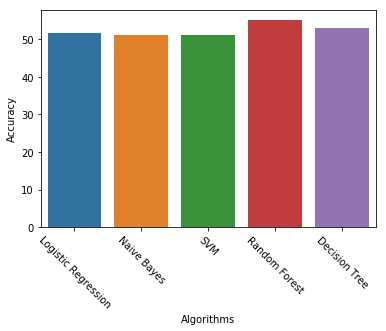

In [43]:
sns.barplot(x= non_norm_df.Algorithms , y= non_norm_df.Accuracy)
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

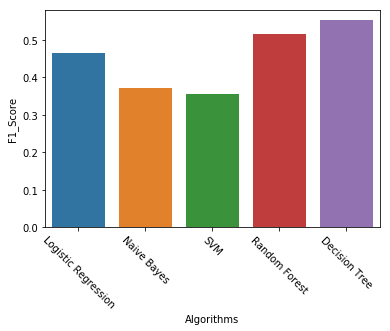

In [44]:
sns.barplot(x= non_norm_df.Algorithms , y= non_norm_df.F1_Score)
plt.xticks(rotation=-45)

### For Normalized Dataset

In [45]:
accuracy = [acc_lr2,acc_nb2,acc_svm2,acc_rf2,acc_dt2]
F1_score = [f_lr2,f_nb2,f_svm2,f_rf2,f_dt2]
print('Normalized Dataset')
d = {
    'Algorithms' : ['Logistic Regression','Naive Bayes','SVM','Random Forest','Decision Tree'],
    'F1_Score' : F1_score,
    'Accuracy' : accuracy,
}
norm_df = pd.DataFrame(d)
norm_df

Normalized Dataset


,Algorithms,F1_Score,Accuracy
0,Logistic Regression,0.464088,51.5
1,Naive Bayes,0.371795,51.0
2,SVM,0.355263,51.0
3,Random Forest,0.492147,51.5
4,Decision Tree,0.568720,54.5


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

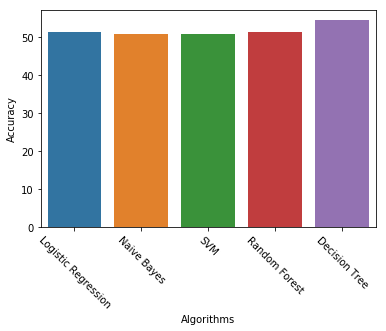

In [46]:
sns.barplot(x= norm_df.Algorithms , y= norm_df.Accuracy)
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

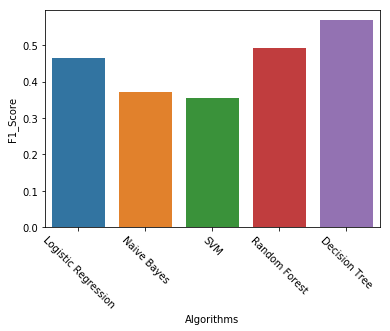

In [47]:
sns.barplot(x= norm_df.Algorithms , y= norm_df.F1_Score)
plt.xticks(rotation=-45)

## Conclusion

Hence, compared the accuracy and f1 score of different algorithms applied on the dataset.